## Used Car Engine Type Prediction

Given *data about used cars*, let's try to predict the **engine type** of a given car.

We will use a Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [4]:
data = pd.read_csv('cars.csv')
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [8]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 10


### Preprocessing

In [9]:
df = data.copy()

In [12]:
print("Columns with Missing Values: ", df.columns[df.isna().sum() > 0].values)

Columns with Missing Values:  ['engine_capacity']


In [13]:
df['engine_capacity'].dtype

dtype('float64')

In [14]:
df['engine_capacity'] = df['engine_capacity'].fillna(df['engine_capacity'].mean())

In [16]:
print("Total missing values:", df.isna().sum().sum())

Total missing values: 0


#### Encoding Features

In [17]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490


First, let's just make all the boolean columns into integer columns.

In [18]:
for column in df.columns:
    if df.dtypes[column] == 'bool':
        df[column] = df[column].astype(int)

Then we will take a look at the number of unique values in each categorical column.

In [19]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas         int64
engine_type           object
engine_capacity      float64
body_type             object
has_warranty           int64
state                 object
drivetrain            object
price_usd            float64
is_exchangeable        int64
location_region       object
number_of_photos       int64
up_counter             int64
feature_0              int64
feature_1              int64
feature_2              int64
feature_3              int64
feature_4              int64
feature_5              int64
feature_6              int64
feature_7              int64
feature_8              int64
feature_9              int64
duration_listed        int64
dtype: object

In [20]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'manufacturer_name': 55,
 'model_name': 1118,
 'transmission': 2,
 'color': 12,
 'engine_fuel': 6,
 'engine_type': 3,
 'body_type': 12,
 'state': 3,
 'drivetrain': 3,
 'location_region': 6}

*model_name* has too many missing values, so let's drop that feature.

In [21]:
df = df.drop('model_name', axis=1)

*transmission* has only two unique values, so we can encode it as a binary feature. 

In [22]:
data['transmission'].unique()

array(['automatic', 'mechanical'], dtype=object)

In [24]:
transmission_mapping = {'automatic':0, 'mechanical': 1}

df['transmission'] = df['transmission'].replace(transmission_mapping)

df

/tmp/ipykernel_5689/921410239.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transmission'] = df['transmission'].replace(transmission_mapping)


,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,0,silver,190000,2010,gasoline,0,gasoline,2.5,universal,0,owned,all,10900.00,0,Минская обл.,9,13,0,1,1,1,0,1,0,1,1,1,16
1,Subaru,0,blue,290000,2002,gasoline,0,gasoline,3.0,universal,0,owned,all,5000.00,1,Минская обл.,12,54,0,1,0,0,1,1,0,0,0,1,83
2,Subaru,0,red,402000,2001,gasoline,0,gasoline,2.5,suv,0,owned,all,2800.00,1,Минская обл.,4,72,0,1,0,0,0,0,0,0,1,1,151
3,Subaru,1,blue,10000,1999,gasoline,0,gasoline,3.0,sedan,0,owned,all,9999.00,1,Минская обл.,9,42,1,0,0,0,0,0,0,0,0,0,86
4,Subaru,0,black,280000,2001,gasoline,0,gasoline,2.5,universal,0,owned,all,2134.11,1,Гомельская обл.,14,7,0,1,0,1,1,0,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,0,silver,290000,2000,gasoline,0,gasoline,3.5,sedan,0,owned,front,2750.00,1,Минская обл.,5,85,0,1,0,0,1,1,0,0,1,1,301
38527,Chrysler,1,blue,321000,2004,diesel,0,diesel,2.2,hatchback,0,owned,front,4800.00,1,Брестская обл.,4,20,0,1,0,0,1,1,0,0,1,1,317
38528,Chrysler,0,blue,777957,2000,gasoline,0,gasoline,3.5,sedan,0,owned,front,4300.00,0,Минская обл.,3,63,0,1,0,0,1,1,0,0,1,1,369
38529,Chrysler,1,black,20000,2001,gasoline,0,gasoline,2.0,minivan,0,owned,front,4000.00,1,Брестская обл.,7,156,0,1,0,0,0,0,0,0,0,1,490


All the remaining features can be one-hot encoded.

We will not encode *engine_type*, as that is our label column.

In [25]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [26]:
onehot_columns = [
    'manufacturer_name',
    'color',
    'engine_fuel',
    'body_type',
    'state',
    'drivetrain',
    'location_region'
]

onehot_prefixes = [
    'm',
    'c',
    'e',
    'b',
    's',
    'd',
    'l'
]

df = onehot_encode(
    df,
    onehot_columns,
    onehot_prefixes
)

In [27]:
df

,transmission,odometer_value,year_produced,engine_has_gas,engine_type,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,m_Acura,m_Alfa Romeo,m_Audi,m_BMW,m_Buick,m_Cadillac,m_Chery,m_Chevrolet,m_Chrysler,m_Citroen,m_Dacia,m_Daewoo,m_Dodge,m_Fiat,m_Ford,m_Geely,m_Great Wall,m_Honda,m_Hyundai,m_Infiniti,m_Iveco,m_Jaguar,m_Jeep,m_Kia,m_LADA,m_Lancia,m_Land Rover,m_Lexus,m_Lifan,m_Lincoln,m_Mazda,m_Mercedes-Benz,m_Mini,m_Mitsubishi,m_Nissan,m_Opel,m_Peugeot,m_Pontiac,m_Porsche,m_Renault,m_Rover,m_Saab,m_Seat,m_Skoda,m_SsangYong,m_Subaru,m_Suzuki,m_Toyota,m_Volkswagen,m_Volvo,m_ВАЗ,m_ГАЗ,m_ЗАЗ,m_Москвич,m_УАЗ,c_black,c_blue,c_brown,c_green,c_grey,c_orange,c_other,c_red,c_silver,c_violet,c_white,c_yellow,e_diesel,e_electric,e_gas,e_gasoline,e_hybrid-diesel,e_hybrid-petrol,b_cabriolet,b_coupe,b_hatchback,b_liftback,b_limousine,b_minibus,b_minivan,b_pickup,b_sedan,b_suv,b_universal,b_van,s_emergency,s_new,s_owned,d_all,d_front,d_rear,l_Брестская обл.,l_Витебская обл.,l_Гомельская обл.,l_Гродненская обл.,l_Минская обл.,l_Могилевская обл.
0,0,190000,2010,0,gasoline,2.5,0,10900.00,0,9,13,0,1,1,1,0,1,0,1,1,1,16,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False
1,0,290000,2002,0,gasoline,3.0,0,5000.00,1,12,54,0,1,0,0,1,1,0,0,0,1,83,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False
2,0,402000,2001,0,gasoline,2.5,0,2800.00,1,4,72,0,1,0,0,0,0,0,0,1,1,151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False
3,1,10000,1999,0,gasoline,3.0,0,9999.00,1,9,42,1,0,0,0,0,0,0,0,0,0,86,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
4,0,280000,2001,0,gasoline,2.5,0,2134.11,1,14,7,0,1,0,1,1,0,0,0,0,1,7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [28]:
print("Remaining non-numeric columns:", (df.dtypes == 'object').sum())

Remaining non-numeric columns: 1


#### Encoding Labels

In [29]:
df['engine_type'].unique()

array(['gasoline', 'diesel', 'electric'], dtype=object)

In [30]:
label_mapping = {
    'gasoline': 0,
    'diesel': 1,
    'electric': 2
}

df['engine_type'] = df['engine_type'].replace(label_mapping)

/tmp/ipykernel_5689/504354789.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['engine_type'] = df['engine_type'].replace(label_mapping)


In [31]:
print("Remaining non-numeric columns:", (df.dtypes == 'object').sum())

Remaining non-numeric columns: 0


#### Visualizing Correlations

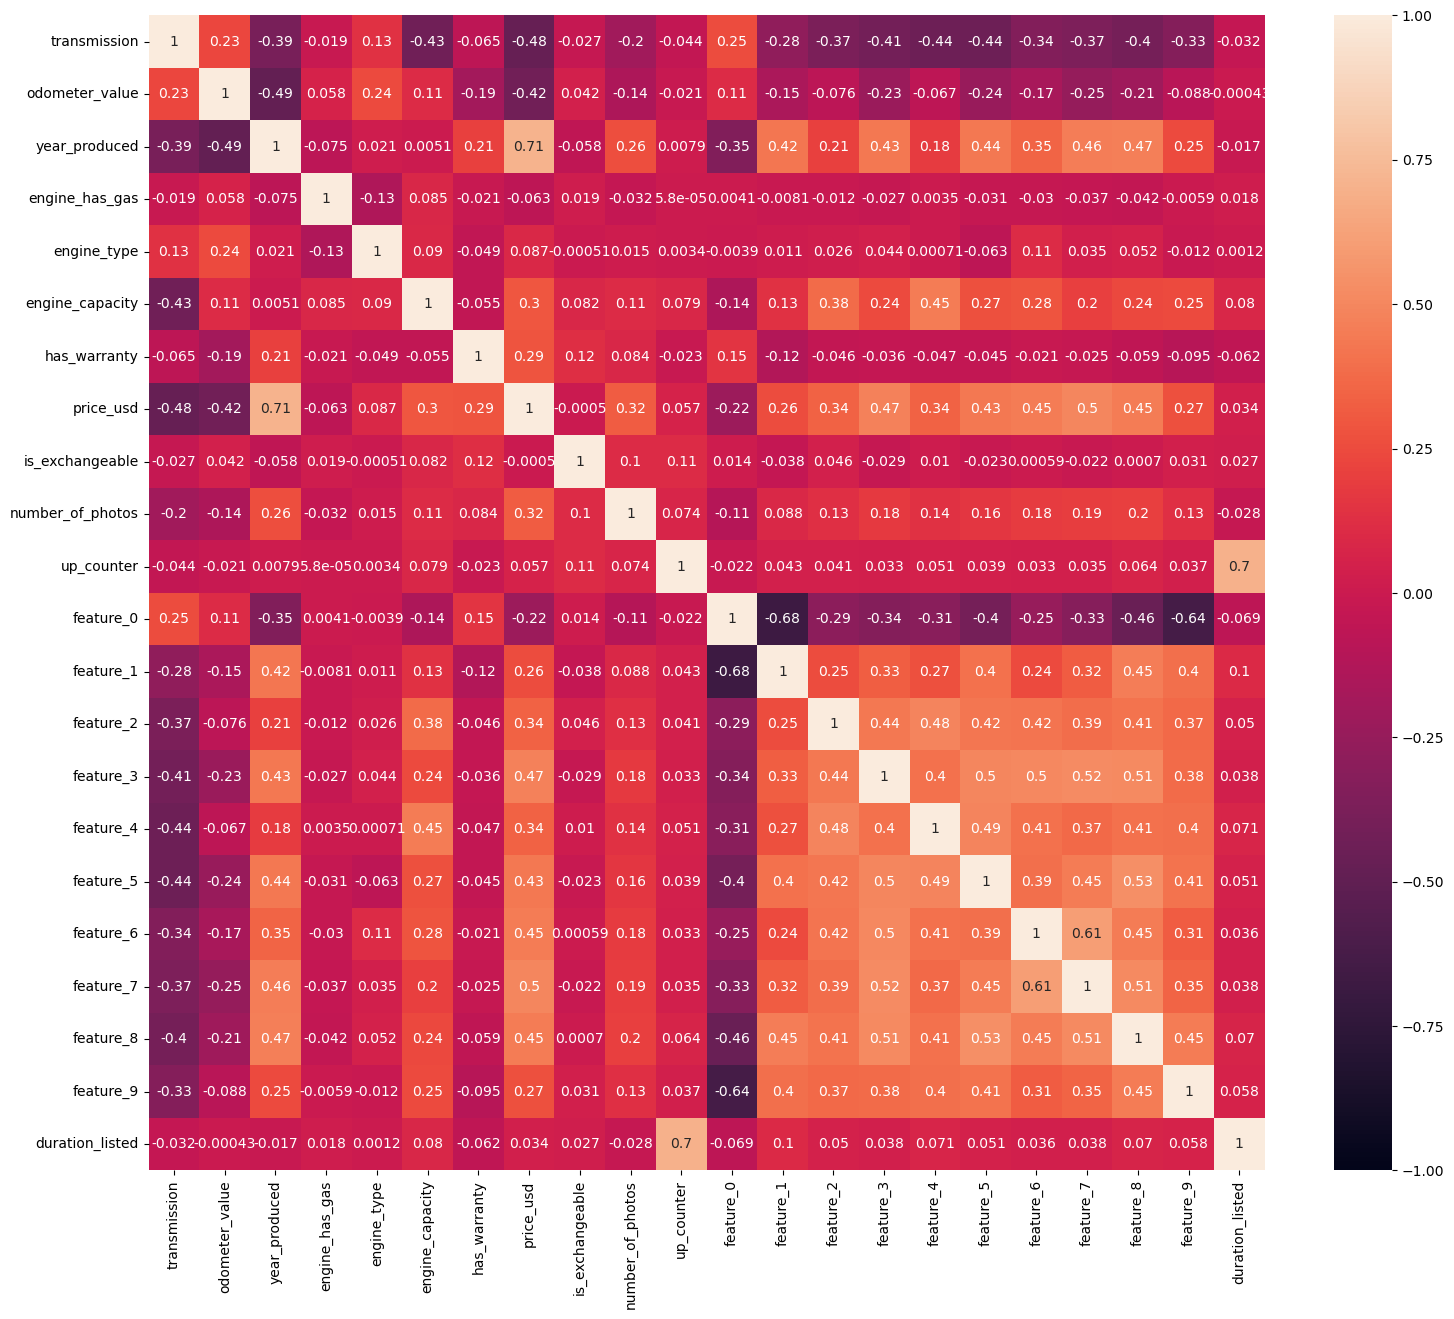

In [34]:
corr = df.loc[:, 'transmission': 'duration_listed'].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='rocket')
plt.show()

#### Splitting/Scaling

In [35]:
y = df['engine_type'].copy()
X = df.drop('engine_type', axis=1).copy()

In [36]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=14)

In [38]:
X_train.shape, X_test.shape

((26971, 118), (11560, 118))

#### Modeling/Training

In [39]:
inputs = tf.keras.Input(shape=(118,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

2025-04-19 10:52:19.037377: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100
675/675 [==============================] - 4s 5ms/step - loss: 0.0729 - accuracy: 0.9770 - val_loss: 0.0041 - val_accuracy: 0.9996
Epoch 2/100
675/675 [==============================] - 3s 4ms/step - loss: 9.3910e-04 - accuracy: 0.9999 - val_loss: 4.4255e-04 - val_accuracy: 1.0000
Epoch 3/100
675/675 [==============================] - 3s 5ms/step - loss: 1.1181e-04 - accuracy: 1.0000 - val_loss: 1.1589e-04 - val_accuracy: 1.0000
Epoch 4/100
675/675 [==============================] - 3s 4ms/step - loss: 3.8927e-05 - accuracy: 1.0000 - val_loss: 7.9700e-05 - val_accuracy: 1.0000
Epoch 5/100
675/675 [==============================] - 2s 3ms/step - loss: 2.0921e-05 - accuracy: 1.0000 - val_loss: 5.9346e-05 - val_accuracy: 1.0000
Epoch 6/100
675/675 [==============================] - 2s 3ms/step - loss: 1.2413e-05 - accuracy: 1.0000 - val_loss: 4.8031e-05 - val_accuracy: 1.0000
Epoch 7/100
675/675 [==============================] - 3s 4ms/step - loss: 7.8101e-06 - accuracy: 1.00

### Results

In [40]:
model.evaluate(X_test, y_test)

362/362 [==============================] - 1s 4ms/step - loss: 3.4004e-07 - accuracy: 1.0000


[3.400372179385158e-07, 1.0]